#  TASK : Prediction using Supervised ML

### Done by : Madhumika Prabhu

### Objective : To predict the percentage of a student based on the number of study hours using simple linear                                    regression.

Importing required packages :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


Importing the dataset :

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url) 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe() #descriptive statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
x = data.Hours
y = data.Scores

Data visualization :

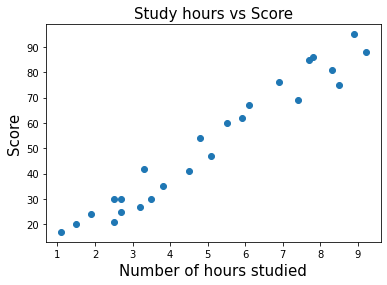

In [5]:
plt.scatter(x, y)
plt.title('Study hours vs Score',fontsize = 15)
plt.xlabel('Number of hours studied',fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.show()


Spliting the data into train and test data :

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train = x_train.values.reshape((-1,1))
x_test = x_test.values.reshape((-1,1))



Fitting the model :

In [7]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

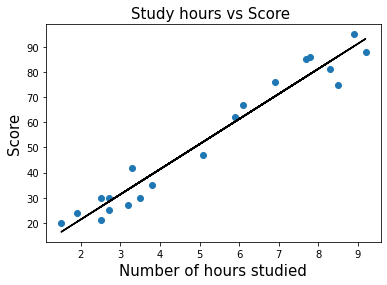

In [8]:
y_est = model.coef_*x_train + model.intercept_
plt.scatter(x_train, y_train)
plt.plot(x_train,y_est,c = "black" )
plt.title('Study hours vs Score ',fontsize = 15)
plt.xlabel('Number of hours studied',fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.show()

In [9]:
z = sm.add_constant(x_train)
Ols = sm.OLS(y_train,z).fit()
Ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     388.7
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.23e-13
Time:                        17:51:53   Log-Likelihood:                -62.458
No. Observations:                  20   AIC:                             128.9
Df Residuals:                      18   BIC:                             130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4709      2.885      0.510      0.616      -4.591       7.533
x1             9.9665      0.506     19.715      0.000       8.904      11.029
==============================================================================
Omnibus:                        3.605   Durbin-Watson:                   2.587
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                1.508
Skew:                          -0.265   Prob(JB):                        0.471
Kurtosis:                       1.764   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of adjusted R-squared for our model  is  95.3 %.


Making predictions and comparing it with test data :

In [10]:
y_pred = model.predict(x_test)
df_compare = pd.DataFrame({'Observed' : y_test , 'Predicted' : y_pred })
df_compare

,Observed,Predicted
21,54,49.310052
19,69,75.222936
14,17,12.434024
7,60,56.286598
12,41,46.320104


Predicting the score for a student who studies for 9.25 hours :

In [11]:
a = np.array(9.25).reshape((-1,1))
a
b=model.predict(a)
print("The predicted score for a student studying for 9.25 hours is",round(float(b),2),".")

The predicted score for a student studying for 9.25 hours is 93.66 .


Evaluating the model:

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.902473347547976
